In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

H0 = 423.937 +- 323.89 km/s/Mpc
1/H0 = 2.31391 Gyr


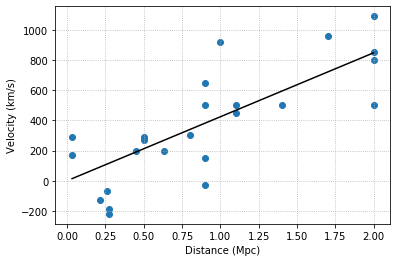

In [3]:
# Velocity - distance relation from Hubble (1929).
import numpy as np
from scipy.optimize import leastsq

D = [0.032, 0.034, 0.214, 0.263, 0.275, 0.275, 0.45, 0.5, \
    0.5, 0.63, 0.8, 0.9, 0.9, 0.9, 0.9, 1.0, \
    1.1, 1.1, 1.4, 1.7, 2.0, 2.0, 2.0, 2.0]
V = [170, 290, -130, -70, -185, -220, 200, 290, \
    270, 200, 300, -30, 650, 150, 500, 920, \
    450, 500, 500, 960, 500, 850, 800, 1090]
D = np.array(D)
V = np.array(V)

# TODO: plot the velocity - distance relation
plt.scatter(D, V)

# Least-square fit
def fitfunc(par, x):
    return par[0] * x

def errfunc(par, x, y):
    return y - fitfunc(par, x)

pfit, pcov = leastsq(errfunc, [0], args=(D, V))

H0 = pfit[0]
res_sq = (errfunc(pfit, D, V)**2).sum() / (len(V)-len(pfit))
H0_err = np.sqrt(pcov * res_sq)

# Unit conversion
km_per_Mpc = 3.09e19
sec_per_Gyr = 3.15e16
# TODO: compute H0 with the unit of Gyr^{-1}
H0_in_Gyr = H0/km_per_Mpc*sec_per_Gyr

print('H0 = {:g} +- {:g} km/s/Mpc'.format(H0, H0_err))
print('1/H0 = {:g} Gyr'.format(1.0/H0_in_Gyr))

# Plot best-fit curve
x = np.linspace(D.min(),D.max())
# TODO: compute the velocity at distances x, given the best-fit H0.
y = H0*x
plt.plot(x, y, 'k-')

plt.grid(ls=':')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.show()

H0 = 88.0236 +- 19.5971 km/s/Mpc
1/H0 = 11.1442 Gyr


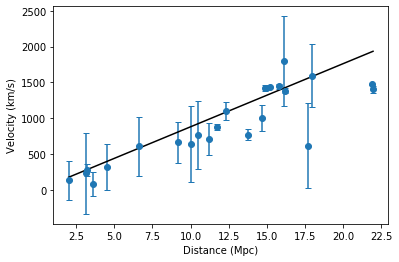

In [4]:
# Velocity - distance relation from Freedman et al. (2001).

D = [2.00, 9.16, 16.14, 17.95, 21.88, 3.22, 11.22, 11.75, \
    3.63, 13.80, 10.00, 10.52, 6.64, 15.21, 17.70, 14.86, \
    16.22, 15.78, 14.93, 21.98, 12.36, 4.49, 3.15, 14.72]
V = [133, 664, 1794, 1594, 1473, 278, 714, 882, \
    80, 772, 642, 768, 609, 1433, 619, 1424, \
    1384, 1444, 1423, 1403, 1103, 318, 232, 999]
dV = [273, 290, 630, 437, 8, 85, 222, 44, \
     166, 76, 533, 470, 411, 3, 596, 43, \
     37, 34, 25, 45, 122, 318, 568, 179]
D = np.array(D)
V = np.array(V)
dV = np.array(dV)

plt.errorbar(D, V, dV, marker='o', ls='none', capsize=3)

# Least-square fit with error bars
def fitfunc(par, x):
    return par[0] * x

# TODO: define the error function
def errfunc(par, x, y, err):
    return (y - fitfunc(par, x))/err

pfit, pcov = leastsq(errfunc, [0], args=(D, V, dV))

H0 = pfit[0]
res_sq = (errfunc(pfit, D, V, dV)**2).sum() \
            / (len(V)-len(pfit))
H0_err = np.sqrt(pcov * res_sq)
H0_in_Gyr = H0 * sec_per_Gyr / km_per_Mpc

print('H0 = {:g} +- {:g} km/s/Mpc'.format(H0, H0_err))
print('1/H0 = {:g} Gyr'.format(1.0/H0_in_Gyr))

x = np.linspace(D.min(),D.max())
y = fitfunc(pfit, x)
plt.plot(x, y, 'k-')

plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.show()